In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d andrewmvd/fetal-health-classification

  0% 0.00/45.8k [00:00<?, ?B/s]
100% 45.8k/45.8k [00:00<00:00, 54.6MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/fetal-health-classification.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score
import plotly.express as px
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
df=pd.read_csv('fetal_health.csv',encoding='latin1')
s,k=df.shape
print('Number of Rows: ',s)
print('Number of Columns: ',k)

Number of Rows:  2126
Number of Columns:  22


In [ ]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
# Checking for null value so that Data Impuation can be done
df.isnull().mean()*100

baseline value                                            0.0
accelerations                                             0.0
fetal_movement                                            0.0
uterine_contractions                                      0.0
light_decelerations                                       0.0
severe_decelerations                                      0.0
prolongued_decelerations                                  0.0
abnormal_short_term_variability                           0.0
mean_value_of_short_term_variability                      0.0
percentage_of_time_with_abnormal_long_term_variability    0.0
mean_value_of_long_term_variability                       0.0
histogram_width                                           0.0
histogram_min                                             0.0
histogram_max                                             0.0
histogram_number_of_peaks                                 0.0
histogram_number_of_zeroes                                0.0
histogra

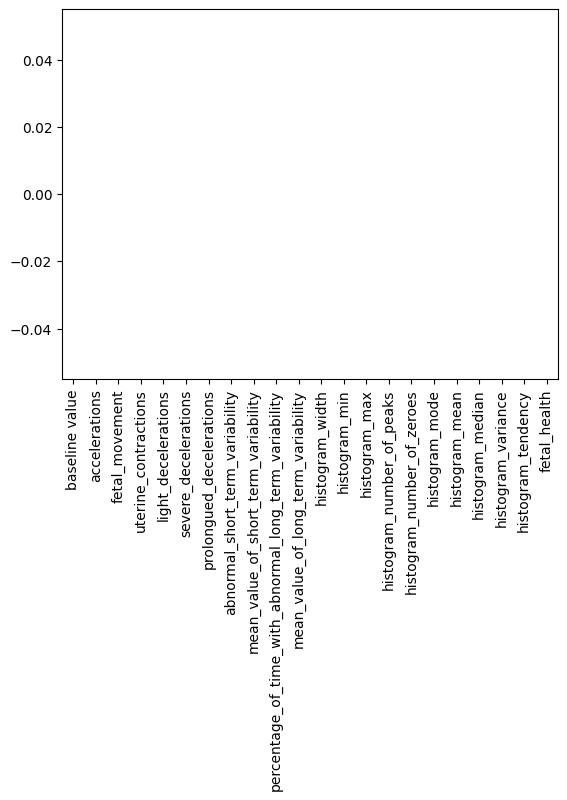

In [ ]:
df.isnull().sum().plot(kind='bar')
plt.show()

In [ ]:
df.groupby('fetal_health').mean()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
fetal_health,,,,,,,,,,,,,,,,,,,,,
1.0,131.981873,0.003992,0.007963,0.004781,0.001941,6.042296e-07,0.000051,42.465861,1.430634,5.044713,...,73.400000,91.085801,164.485801,4.163142,0.335347,138.258610,135.102115,138.459819,17.479758,0.341994
2.0,141.684746,0.000275,0.008332,0.002390,0.000536,0.000000e+00,0.000095,61.901695,0.638983,29.030508,...,49.159322,113.294915,162.454237,3.311864,0.244068,146.555932,144.759322,147.071186,7.213559,0.433898
3.0,131.687500,0.000392,0.025676,0.003784,0.003670,3.409091e-05,0.001273,64.539773,1.575568,22.846591,...,78.346591,83.982955,162.329545,4.443182,0.346591,114.607955,112.977273,119.562500,50.732955,-0.073864


In [ ]:
!pip install datacleaner
!pip install fasteda

  Preparing metadata (setup.py) ... done
  Created wheel for datacleaner: filename=datacleaner-0.1.5-py3-none-any.whl size=7408 sha256=02b342ba868d689c0211b8f72eec33e0d7d595ee05e215b704c16c52c92b5d6e
  Stored in directory: /root/.cache/pip/wheels/8f/bc/5b/f7ca5772f61851334a8580f3ede175b92a7122eef3464e2b3d
Successfully built datacleaner
  Preparing metadata (setup.py) ... done
  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4723 sha256=9ff396bb0399a040b2c176d5780c5925a12006f762878a35eb920fb9197cb48e
  Stored in directory: /root/.cache/pip/wheels/ed/08/72/0d0ec0d3927d227b38ce9542ec3fa6b975c2e17ad0d046dcee
Successfully built fasteda


In [ ]:
from datacleaner import autoclean
from fasteda import fast_eda

In [ ]:
df2=df.drop("fetal_health",axis=1)

In [ ]:
k=df2.duplicated().sum()
print('Duplicates present in the dataset are: ',k)

Duplicates present in the dataset are:  15


In [ ]:
df2=df2.drop_duplicates()
print('Duplicates present in the dataset are: ',df2.duplicated().sum())

Duplicates present in the dataset are:  0


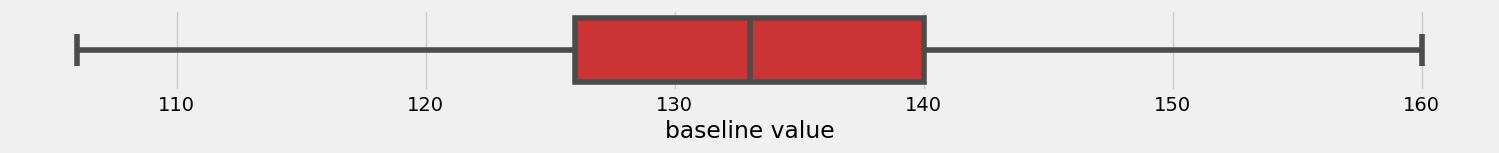

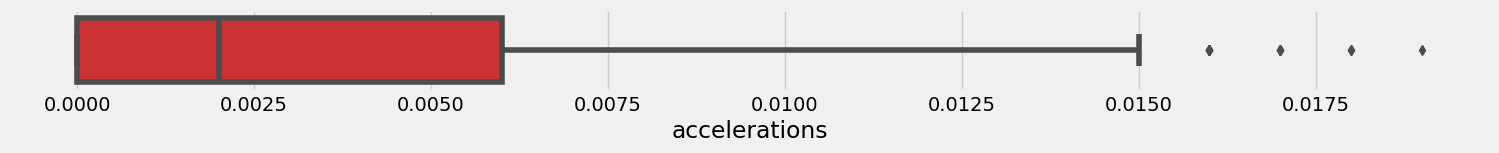

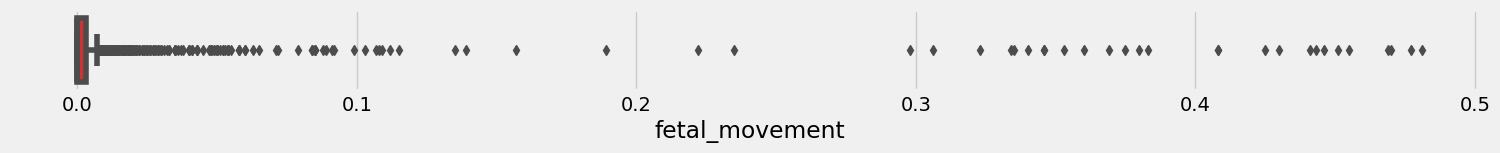

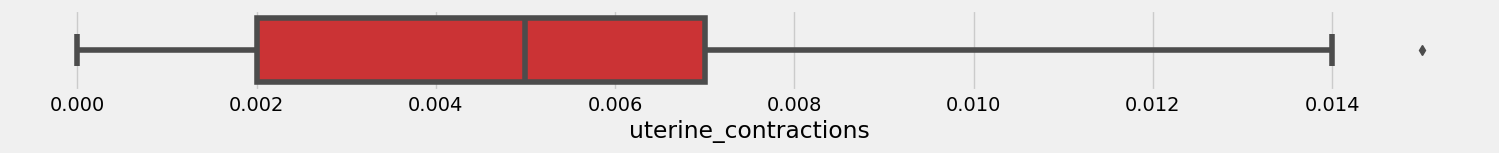

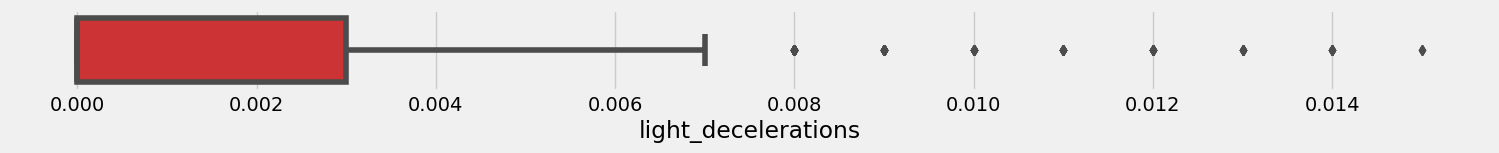

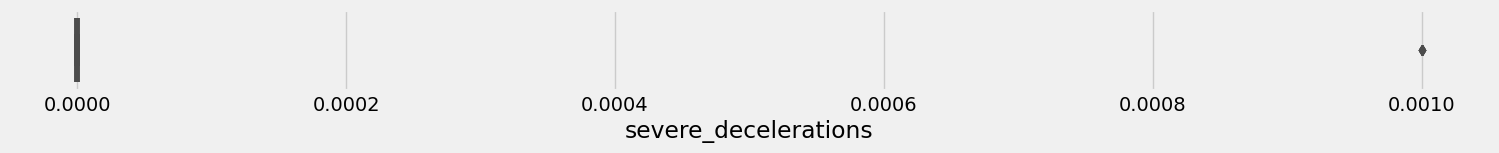

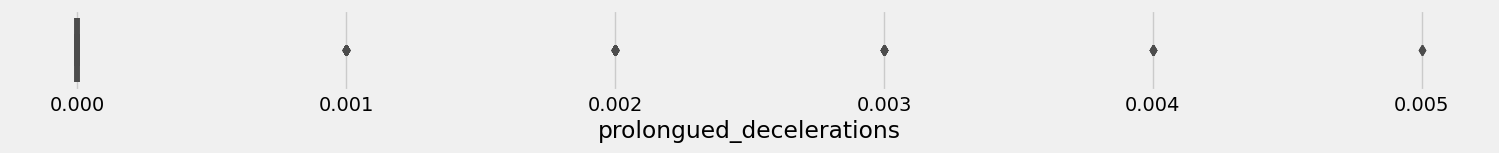

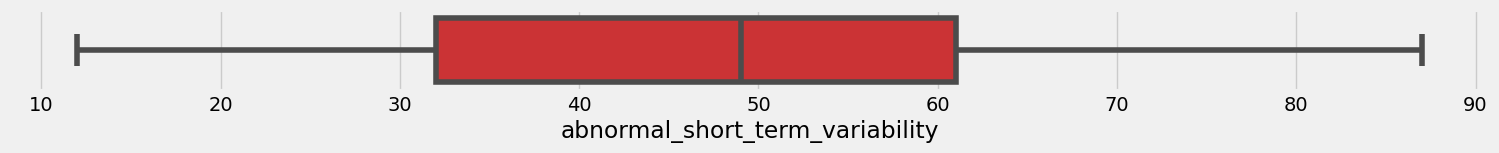

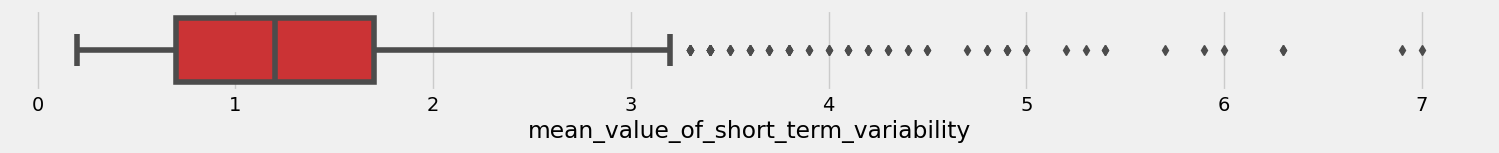

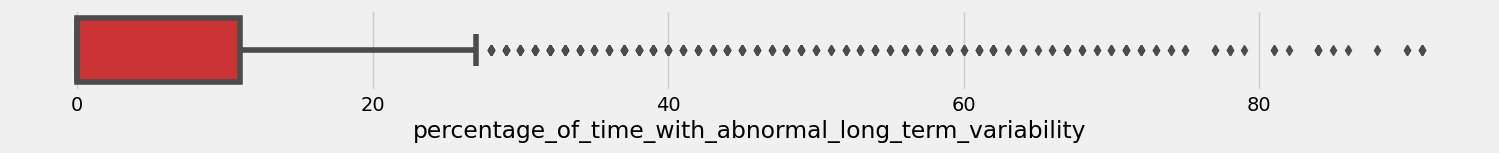

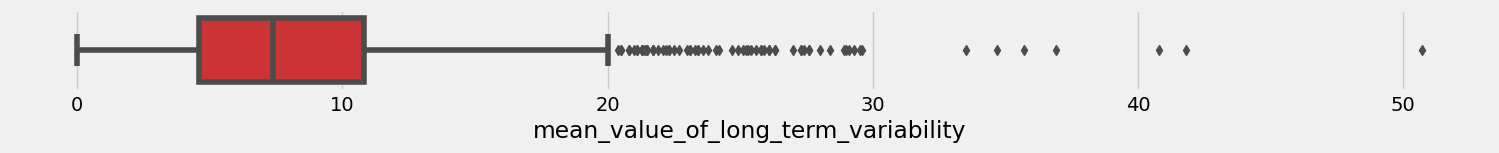

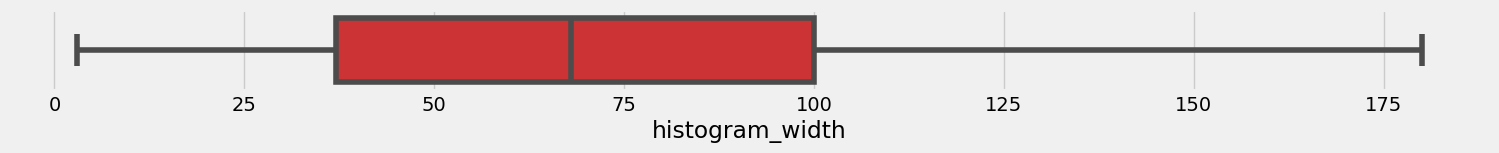

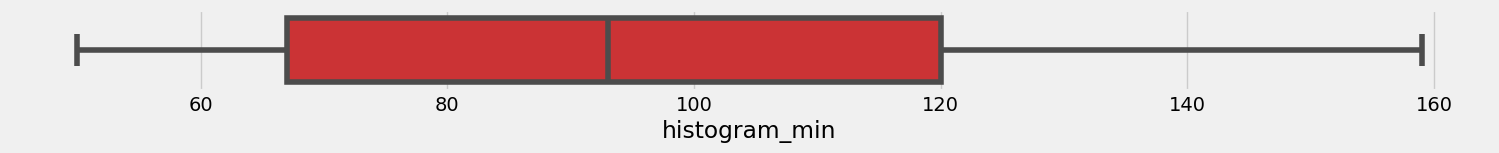

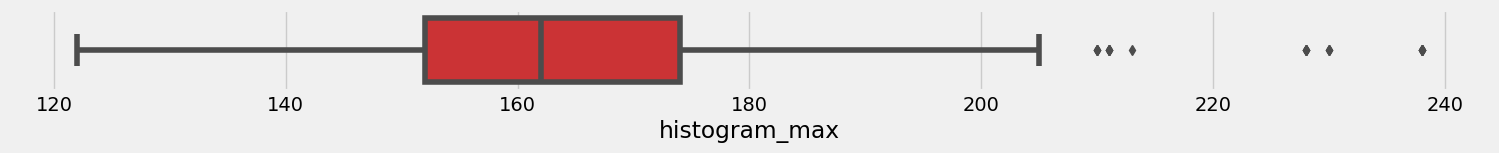

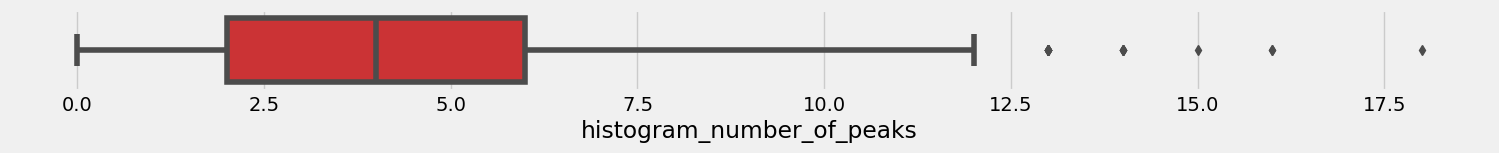

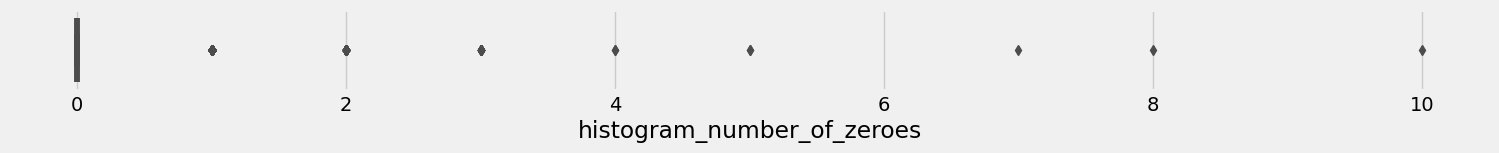

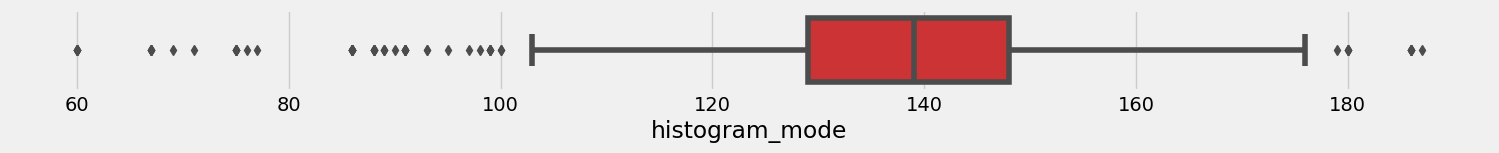

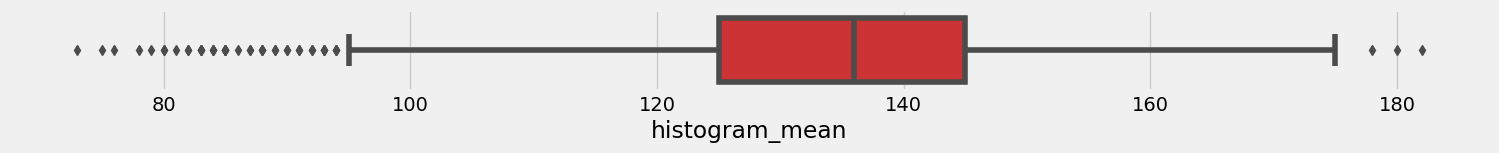

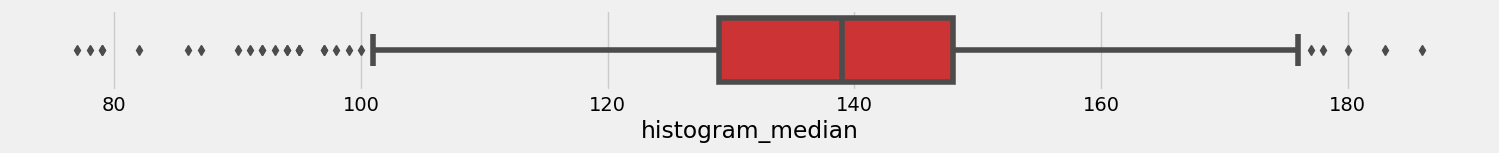

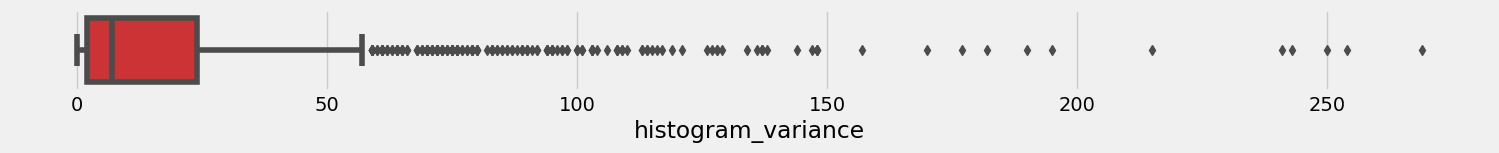

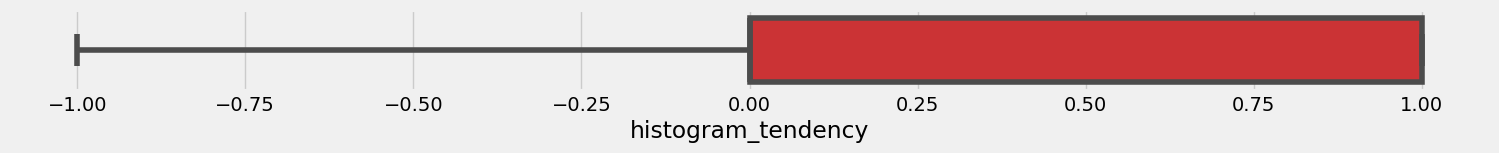

In [ ]:
for col in df2:
        plt.figure(figsize=(17,1))
        sns.boxplot(data = df2, x=col,palette='Set1')
plt.show()

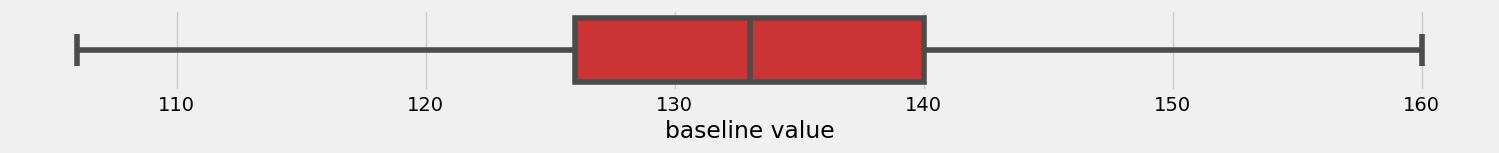

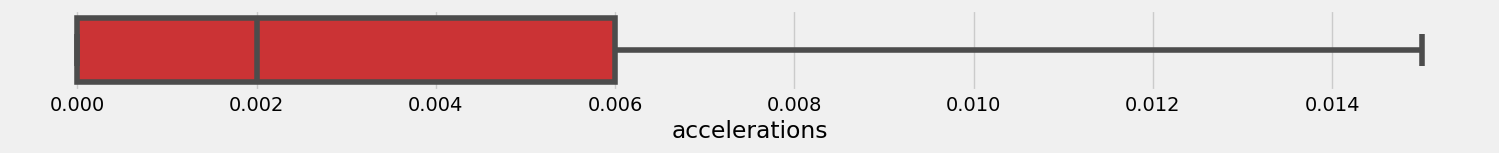

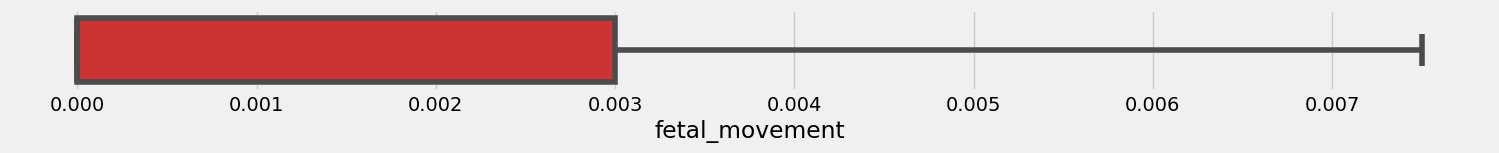

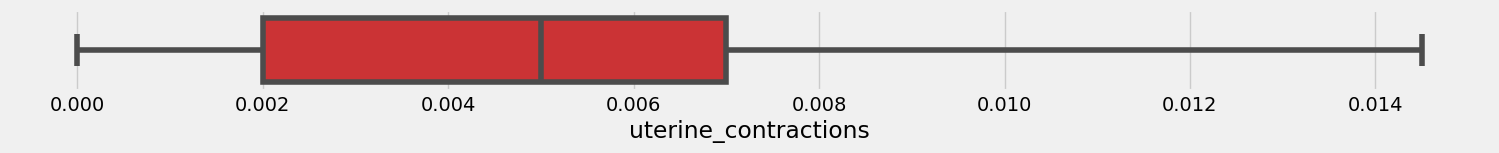

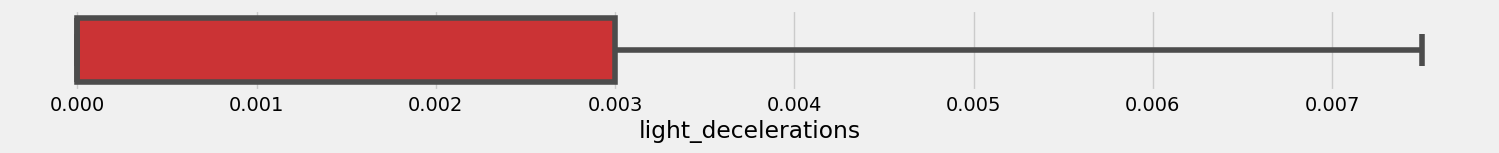

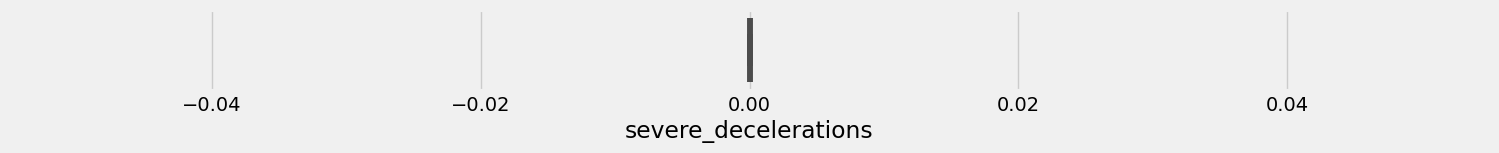

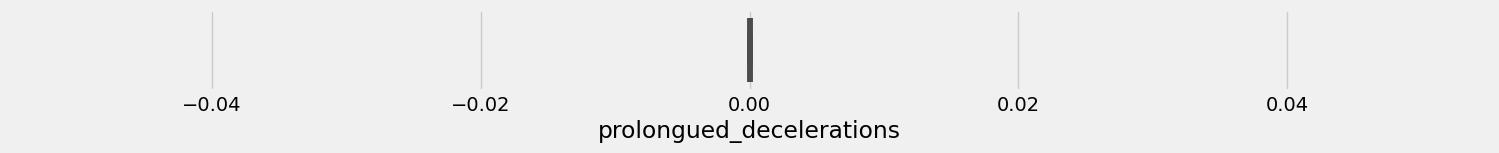

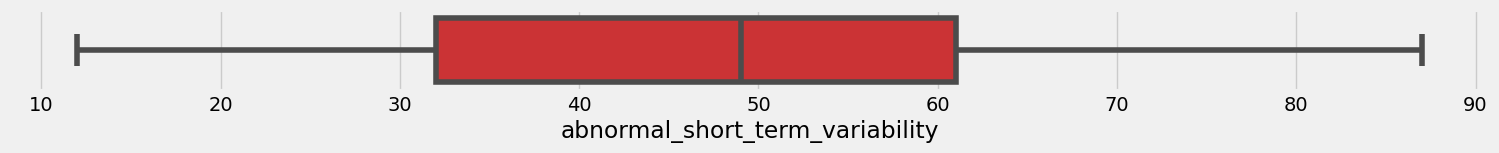

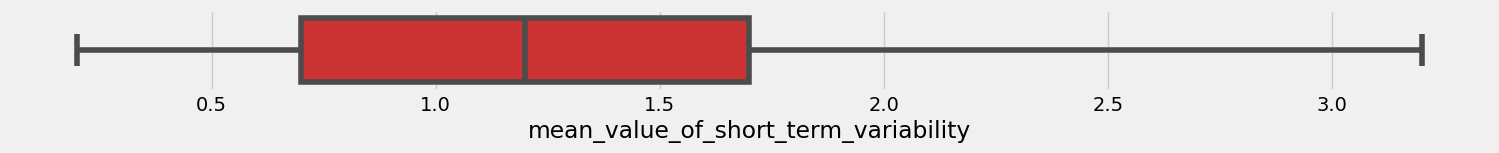

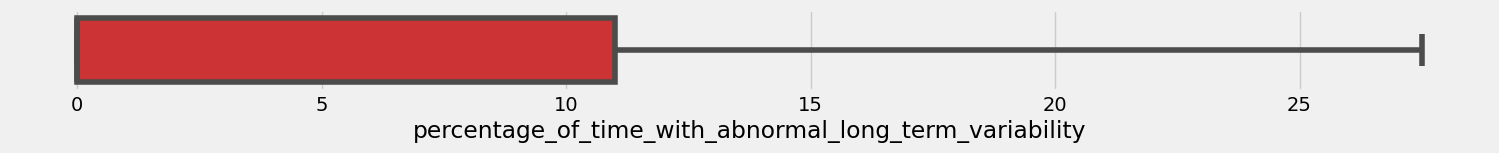

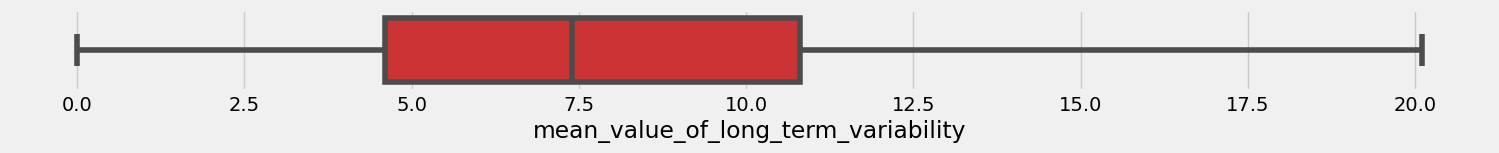

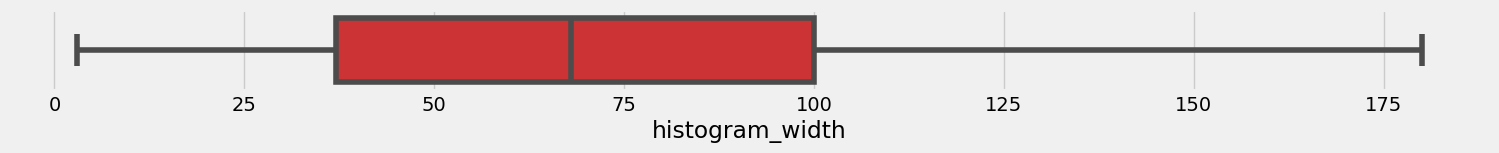

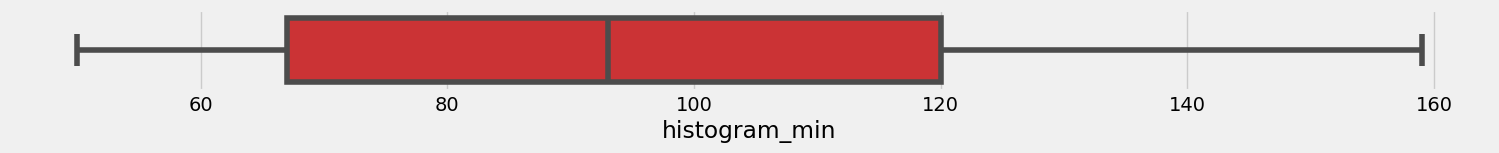

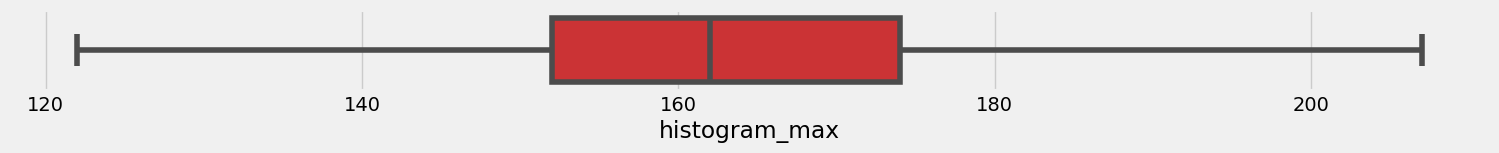

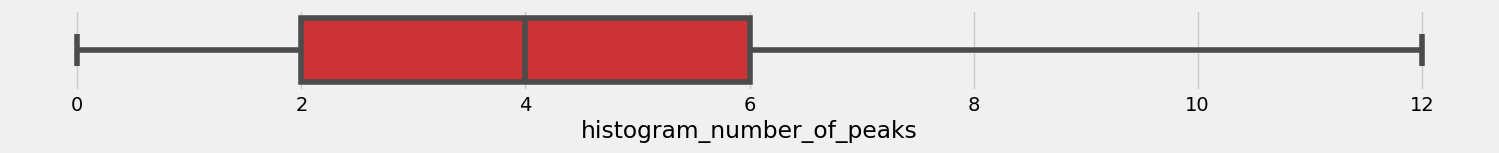

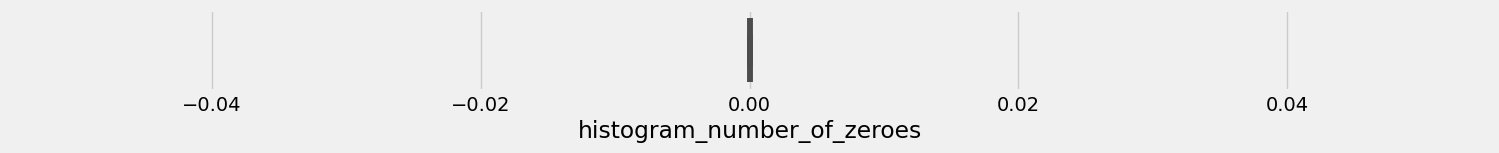

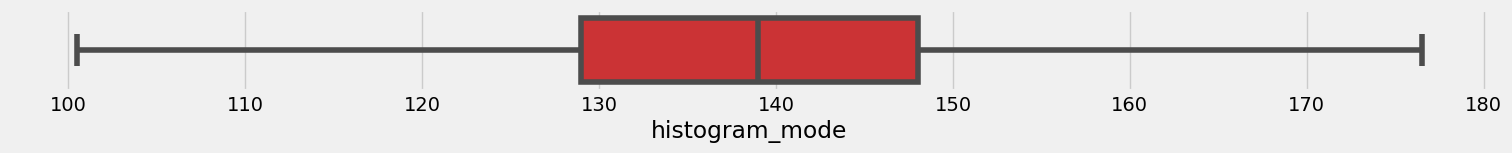

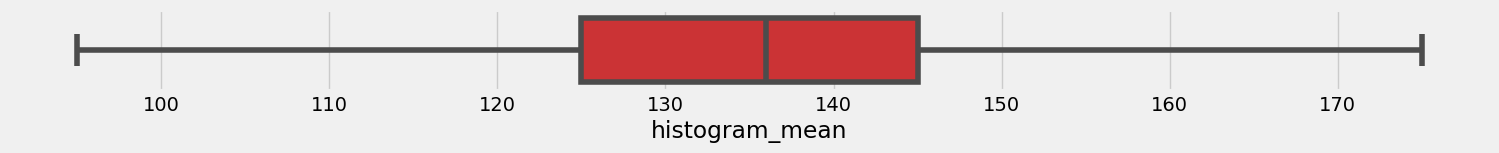

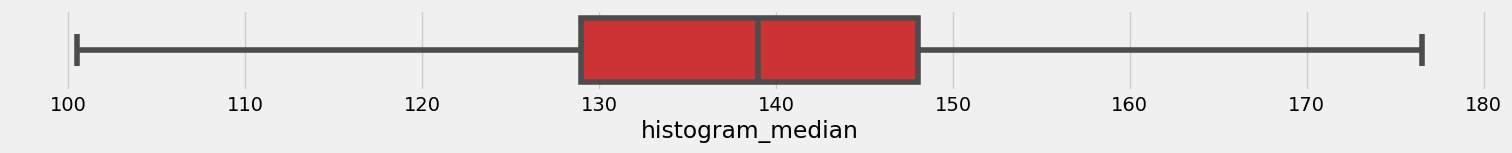

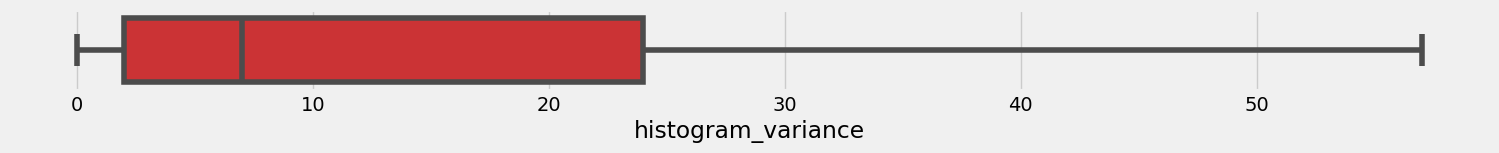

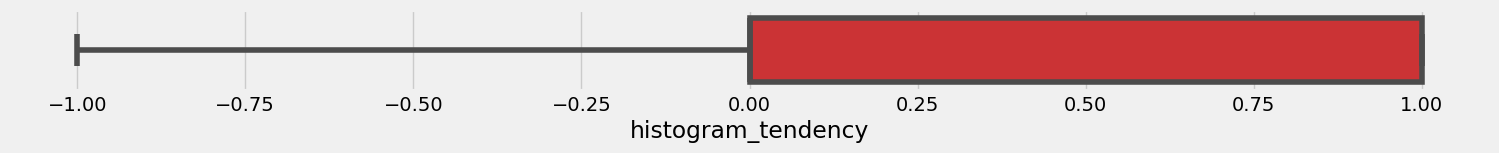

In [ ]:
for cols in df2:
    q1 = df2[cols].quantile(0.25)
    q3 = df2[cols].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - (whisker_width * iqr)
    upper_whisker = q3 + whisker_width * iqr
    df2[cols] = np.where(df2[cols] > upper_whisker, upper_whisker, np.where(df2[cols] < lower_whisker, lower_whisker, df2[cols]))

for col in df2:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df2, x=col,palette='Set1')

In [ ]:
df2["fetal_health"] = df[["fetal_health"]]
df2.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,27.5,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,57.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,0.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,0.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,20.1,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


DataFrame Head:


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,27.5,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,57.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,0.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,0.0,141.0,135.0,138.0,13.0,0.0,1.0


DataFrame Tail:


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,27.5,5.0,42.0,117.0,159.0,2.0,0.0,145.0,143.0,145.0,1.0,0.0,1.0


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(2111, 22)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2111 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2111 non-null   float64
 1   accelerations                                           2111 non-null   float64
 2   fetal_movement                                          2111 non-null   float64
 3   uterine_contractions                                    2111 non-null   float64
 4   light_decelerations                                     2111 non-null   float64
 5   severe_decelerations                     

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
baseline value,2111,133.305,133,9.835,106,126,133,140,160,0.019747,-0.280995
accelerations,2111,0.003,0.002,0.004,0,0,0.002,0.006,0.015,1.138738,0.434103
fetal_movement,2111,0.002,0,0.003,0,0,0,0.003,0.008,1.317267,0.059102
uterine_contractions,2111,0.004,0.005,0.003,0,0.002,0.005,0.007,0.014,0.150116,-0.641321
light_decelerations,2111,0.002,0,0.003,0,0,0,0.003,0.008,1.198087,-0.022398
severe_decelerations,2111,0,0,0,0,0,0,0,0,nan,nan
prolongued_decelerations,2111,0,0,0,0,0,0,0,0,nan,nan
abnormal_short_term_variability,2111,47.002,49,17.178,12,32,49,61,87,-0.012154,-1.051628
mean_value_of_short_term_variability,2111,1.302,1.2,0.772,0.2,0.7,1.2,1.7,3.2,0.786908,-0.073784
percentage_of_time_with_abnormal_long_term_variability,2111,6.624,0,10.267,0,0,0,11,27.5,1.252667,-0.113403


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



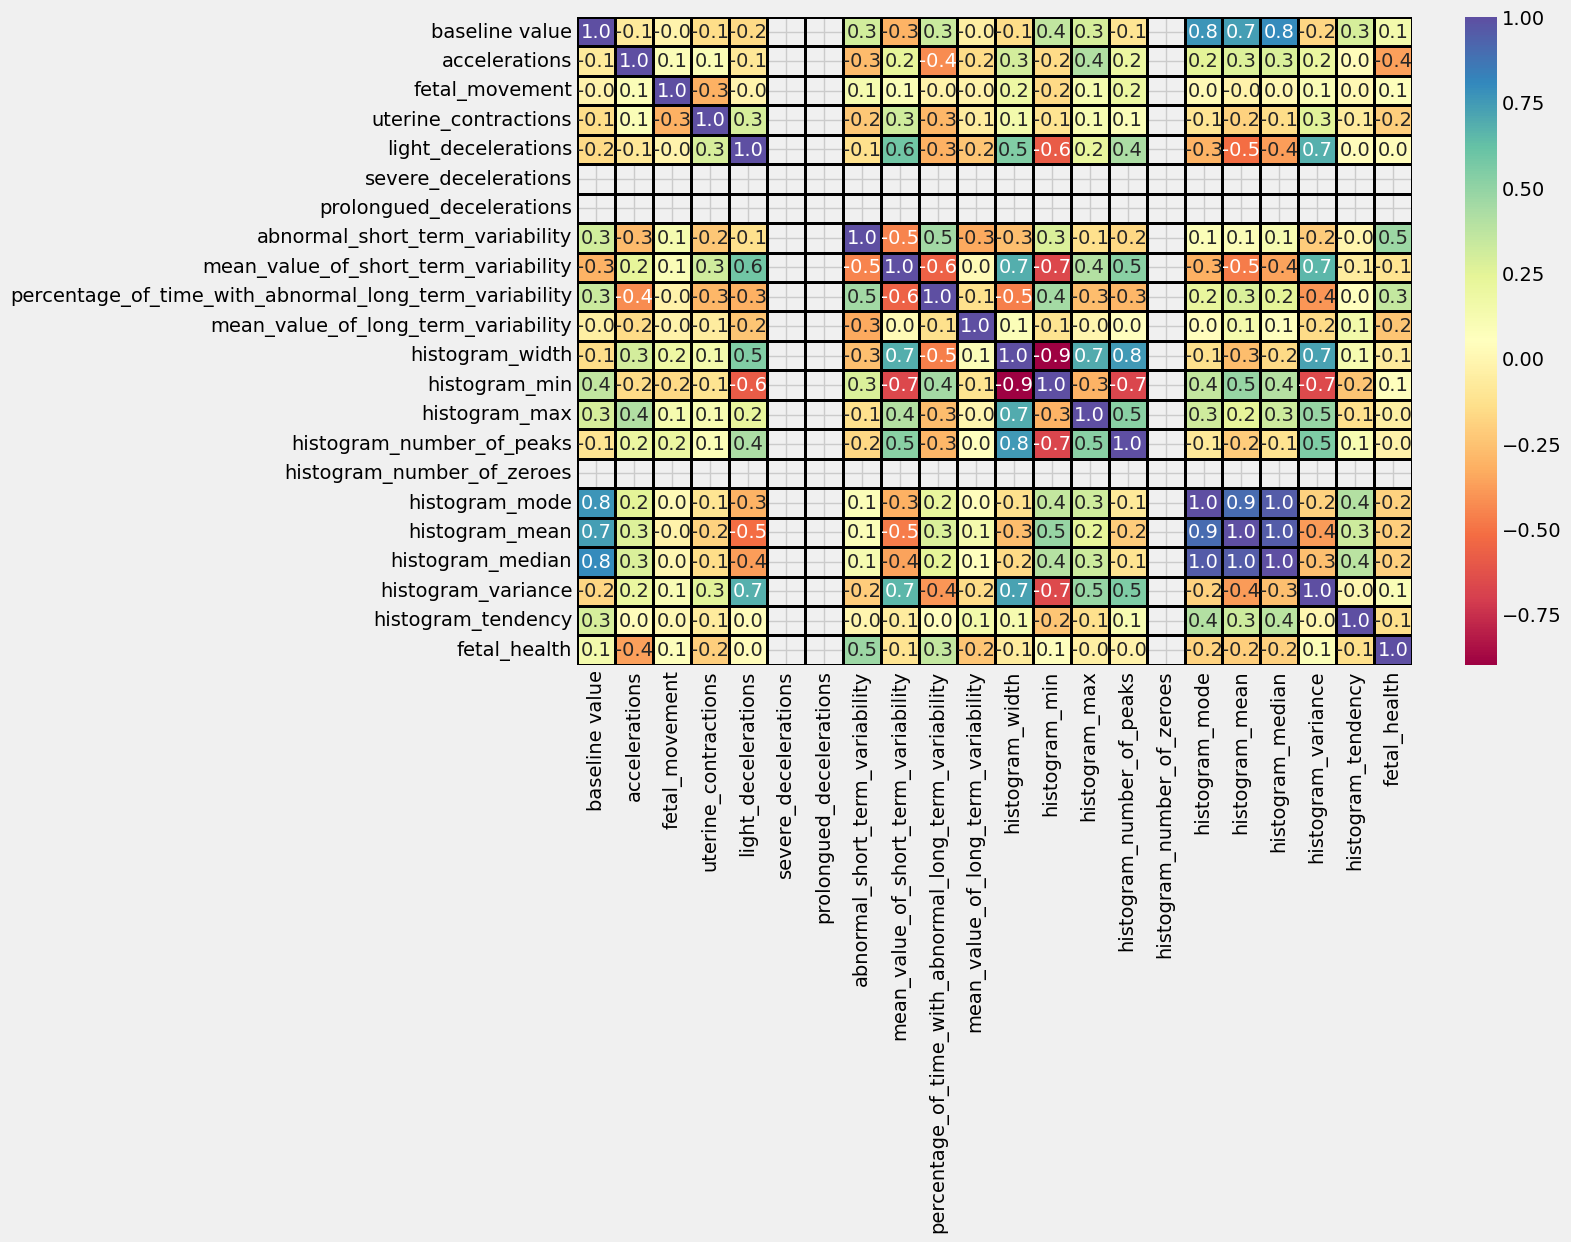

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



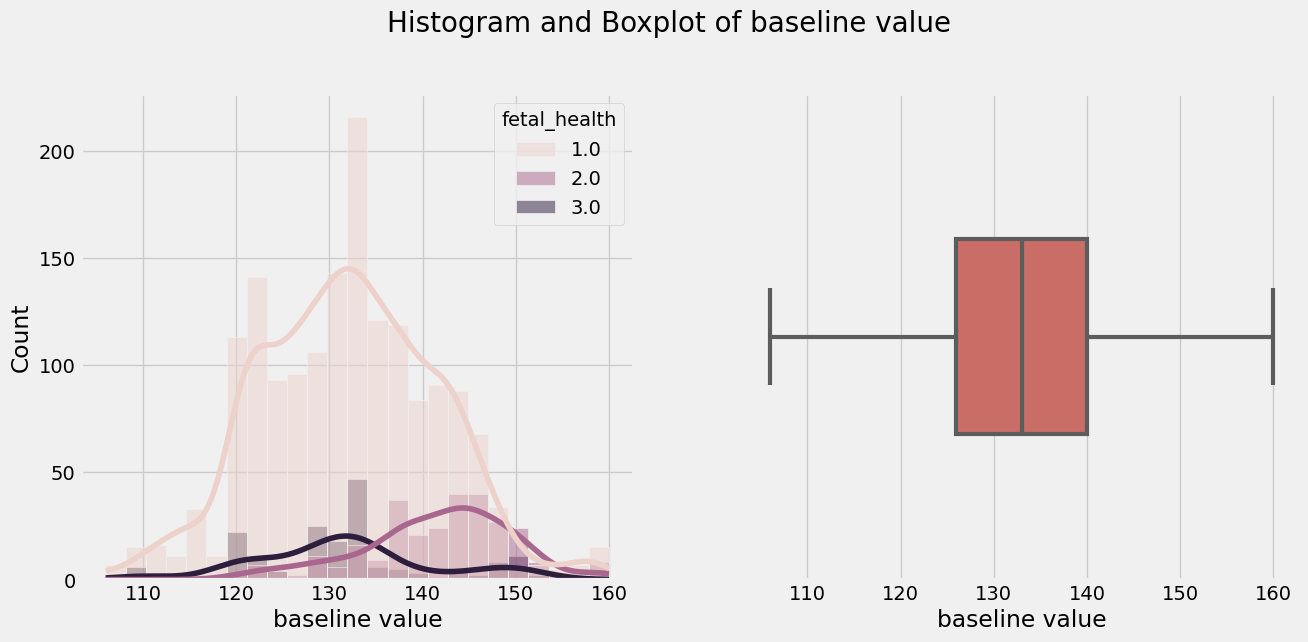

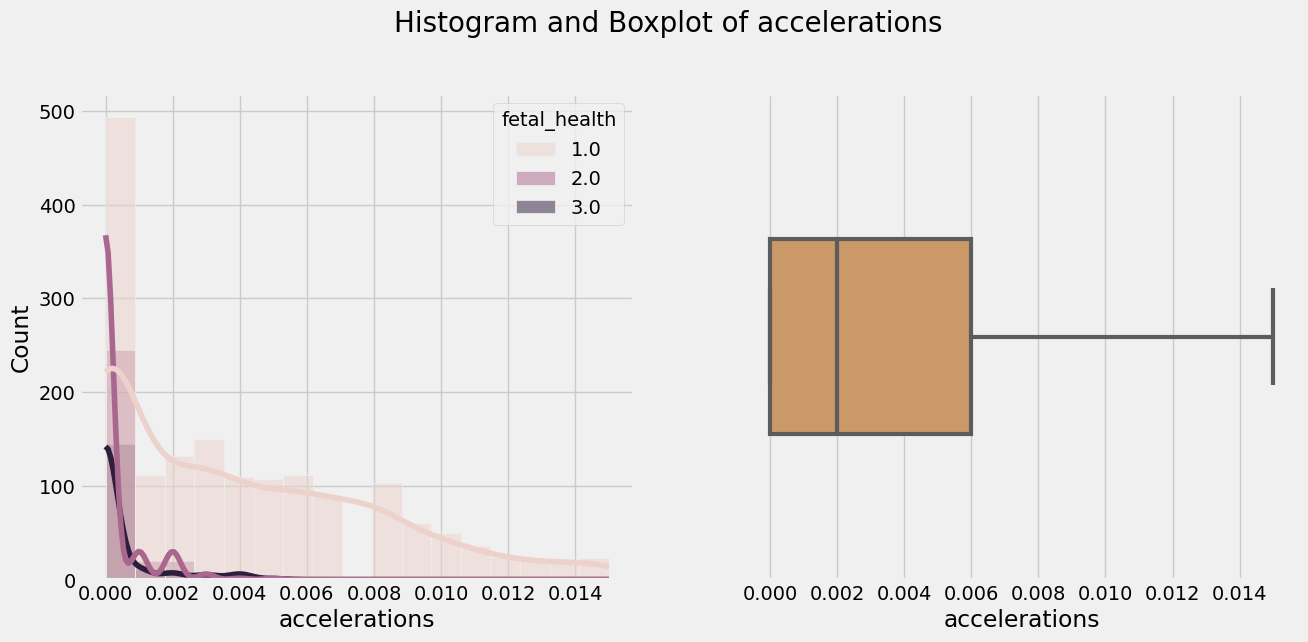

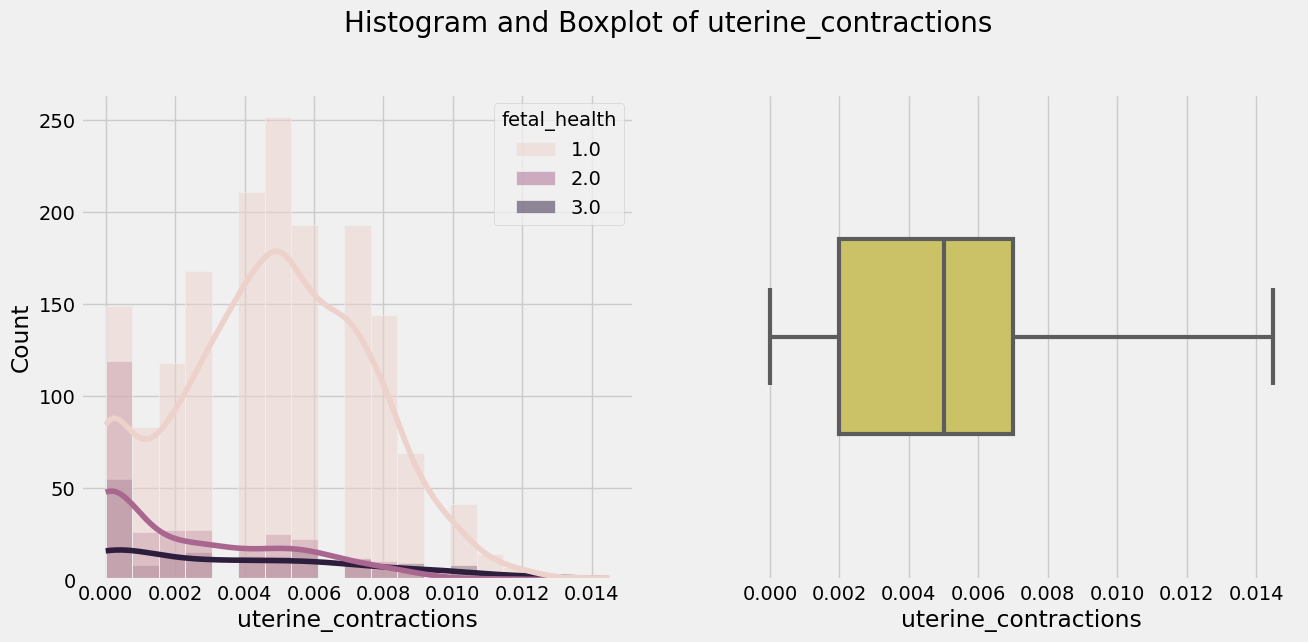

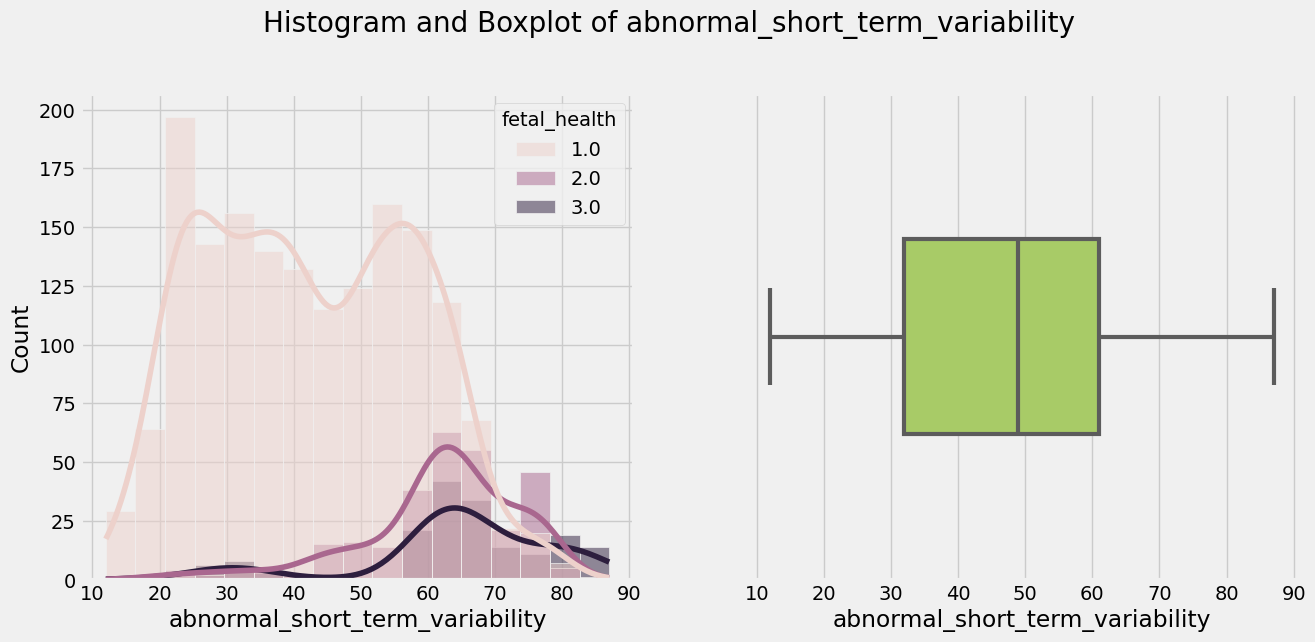

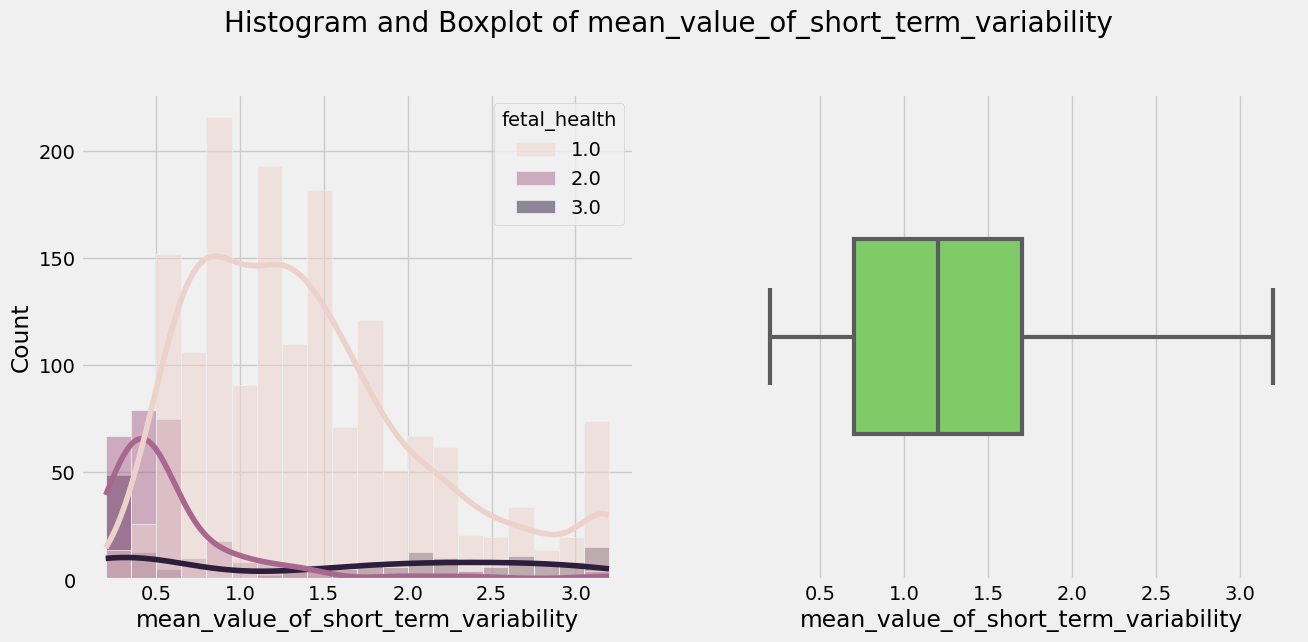

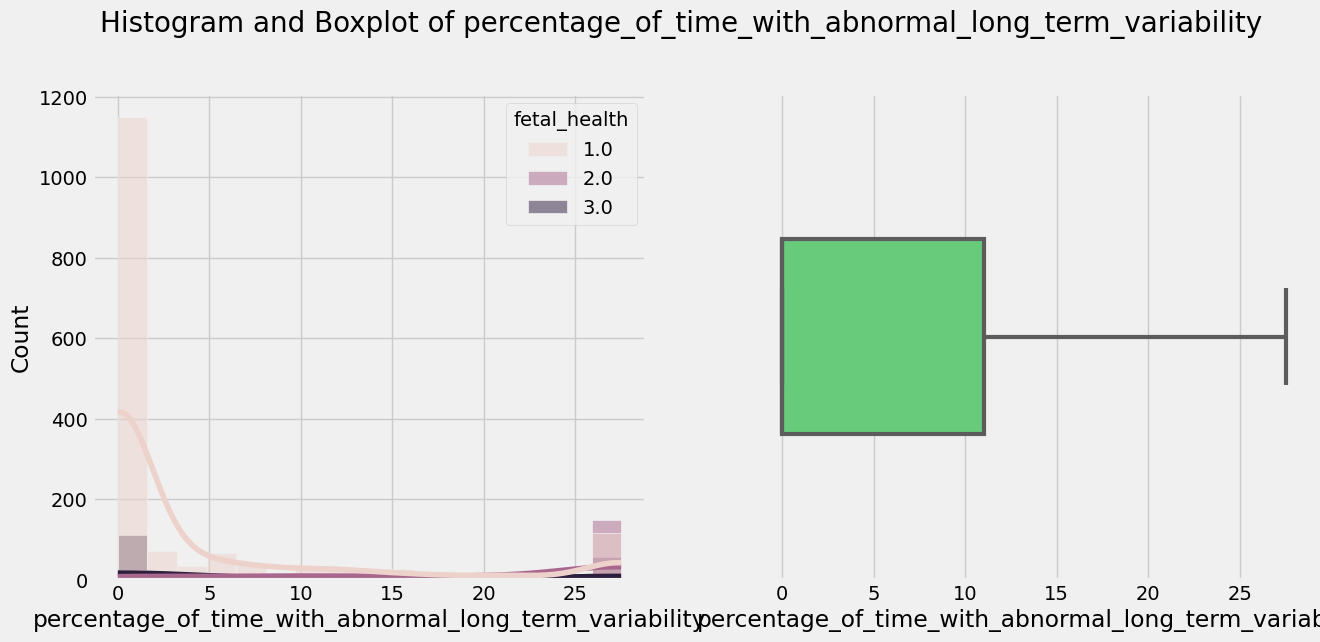

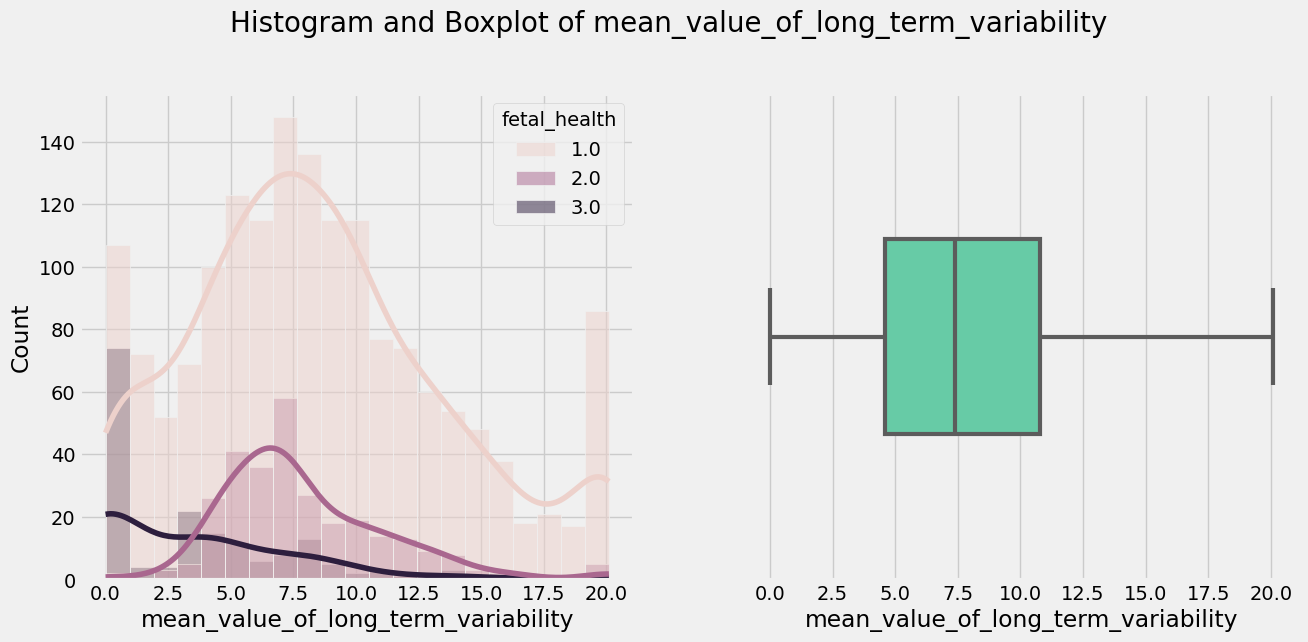

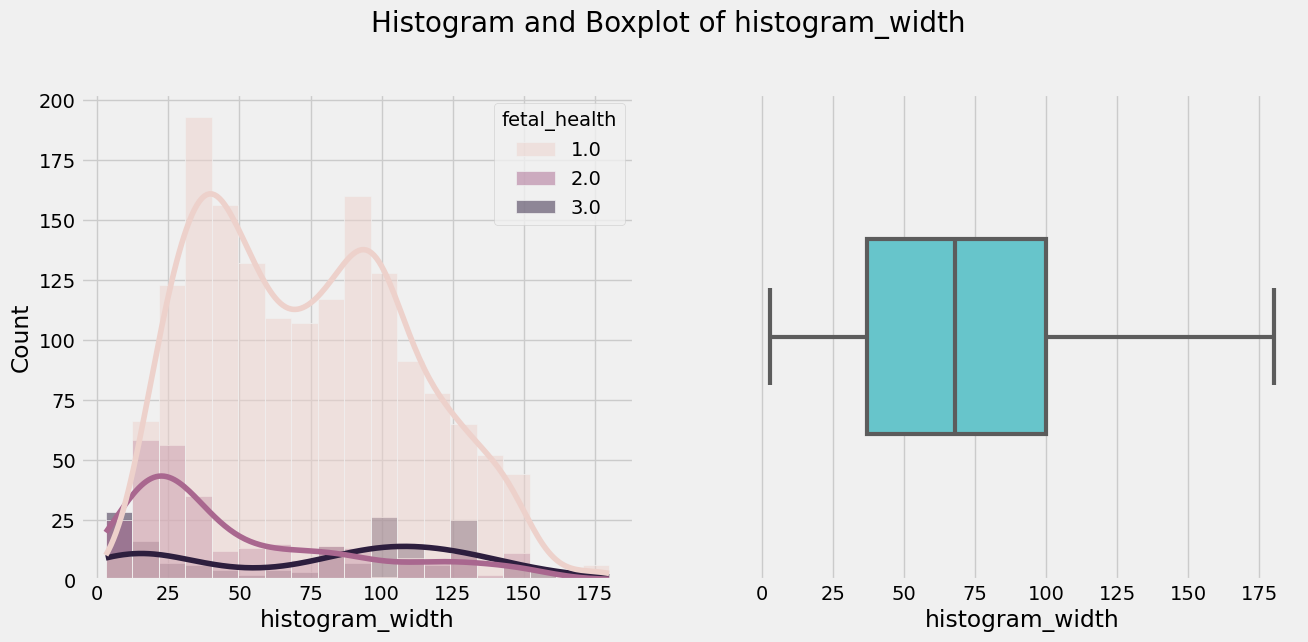

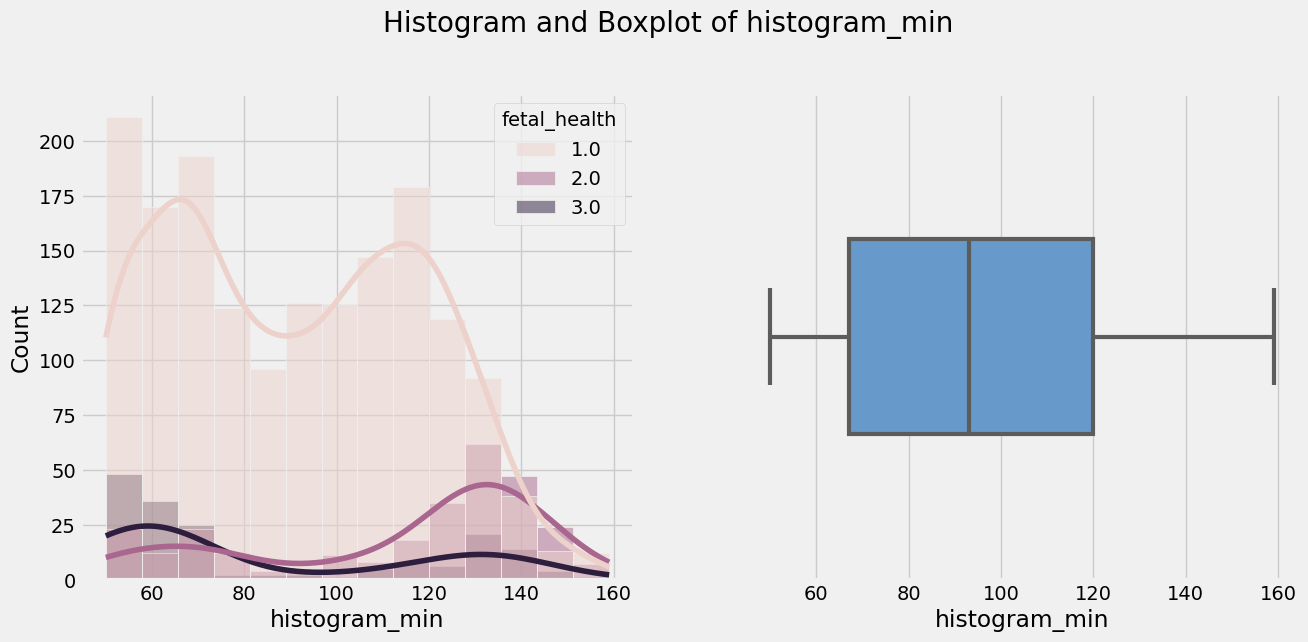

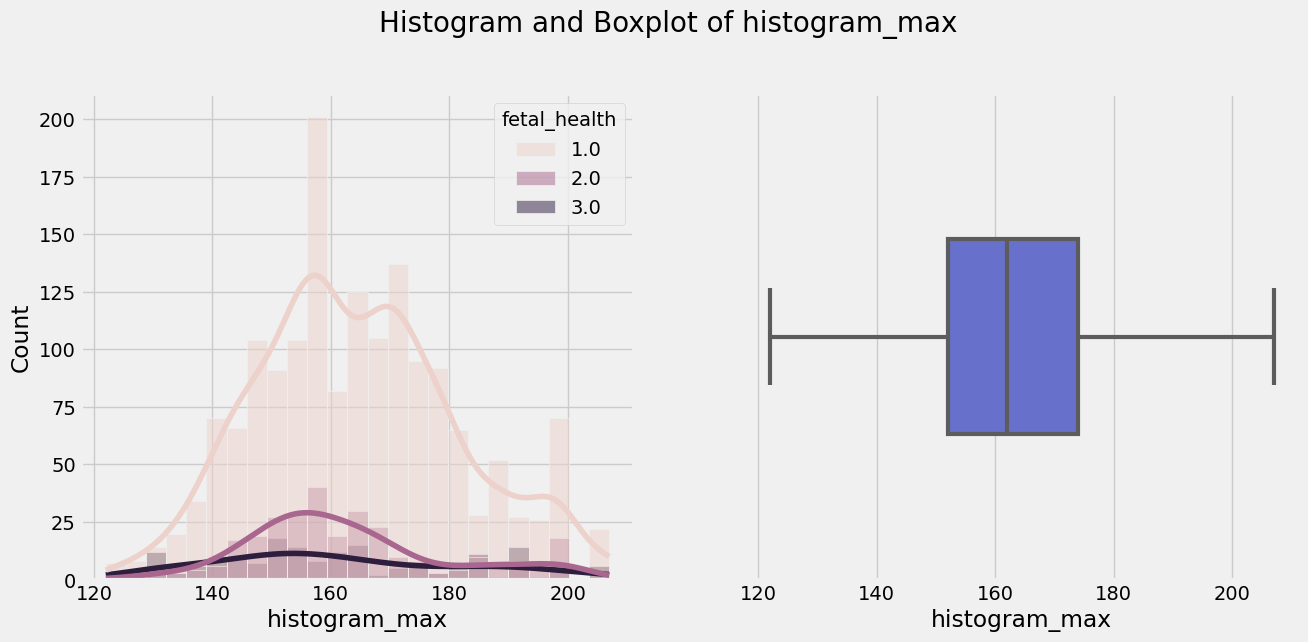

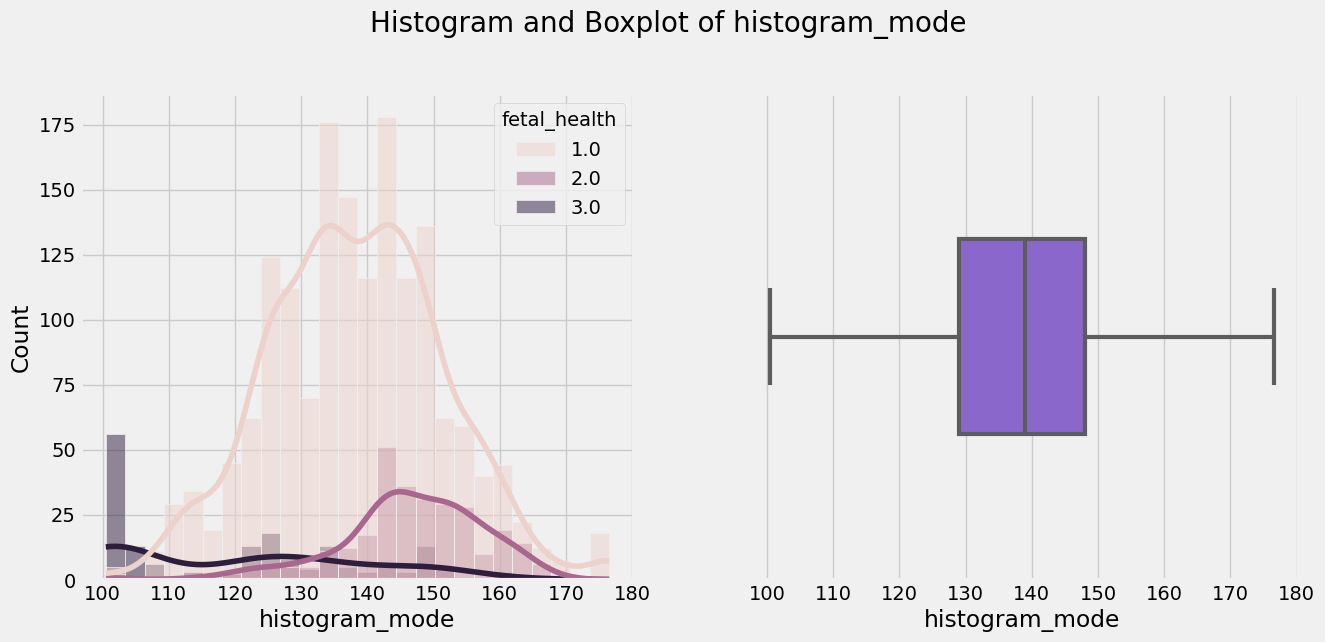

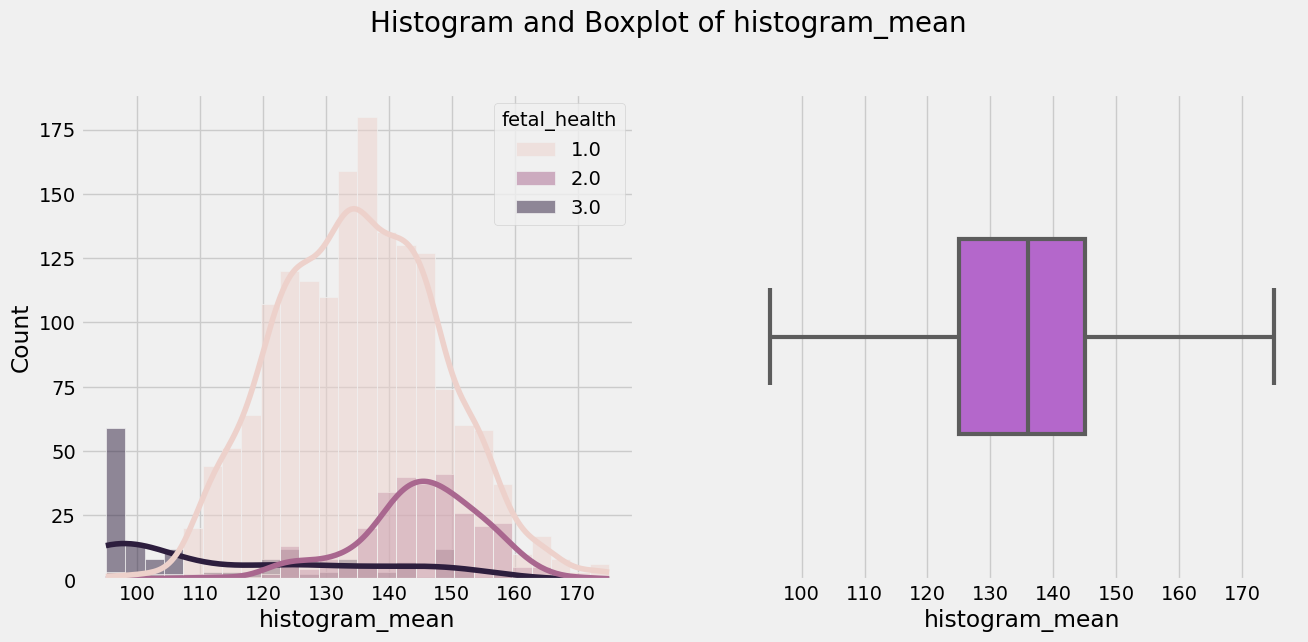

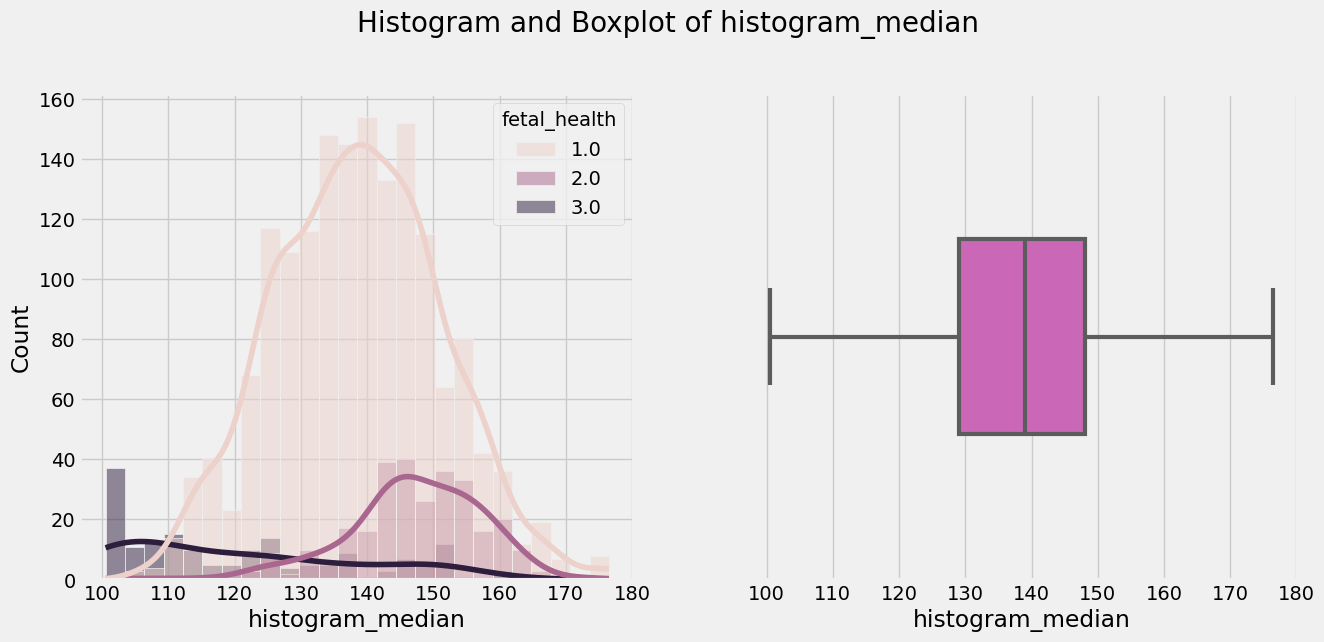

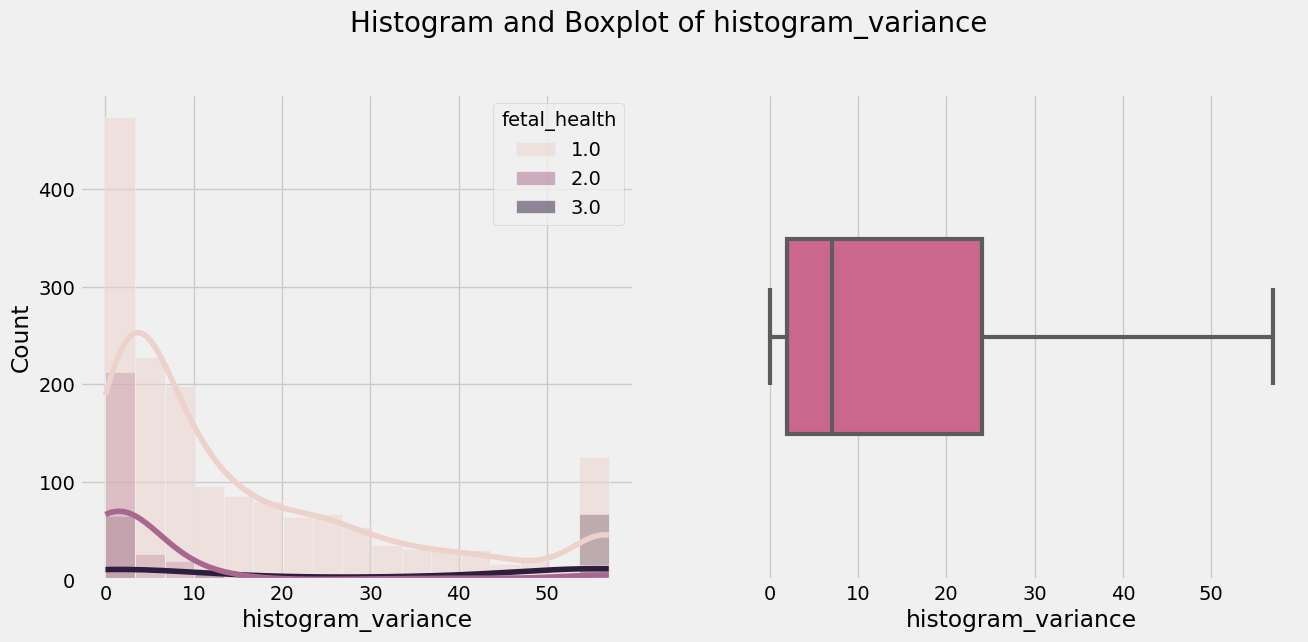

----------------------------------------------------------------------------------------------------
Countplot(s):



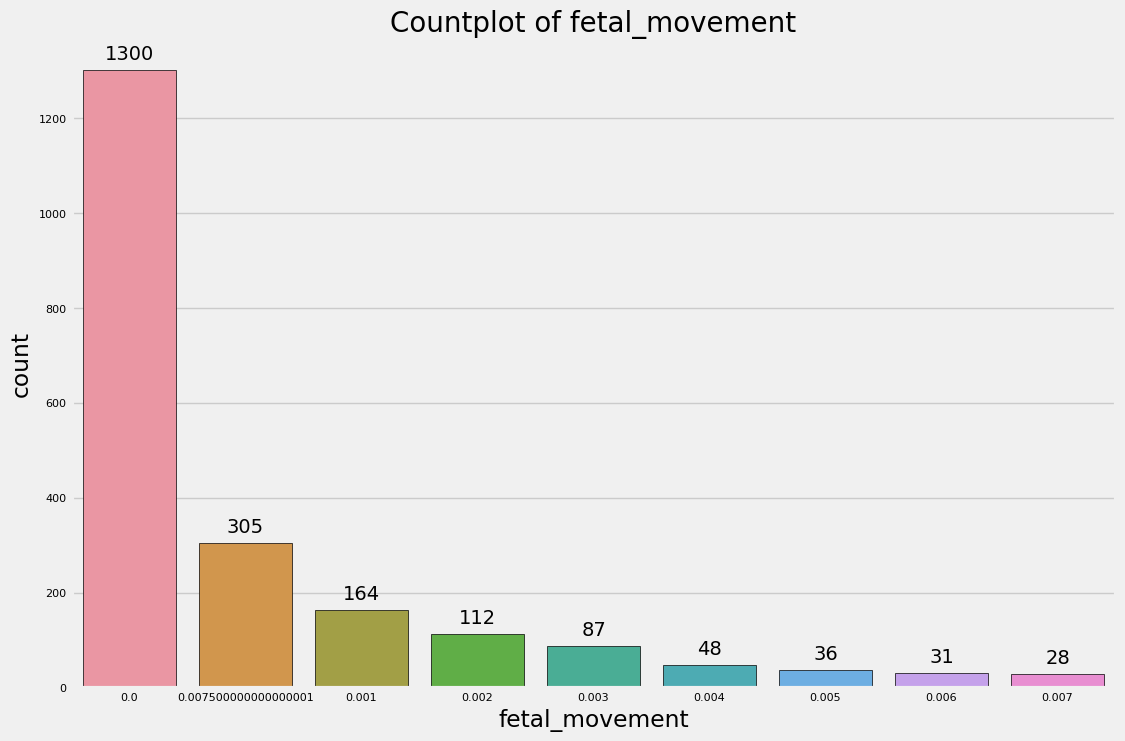

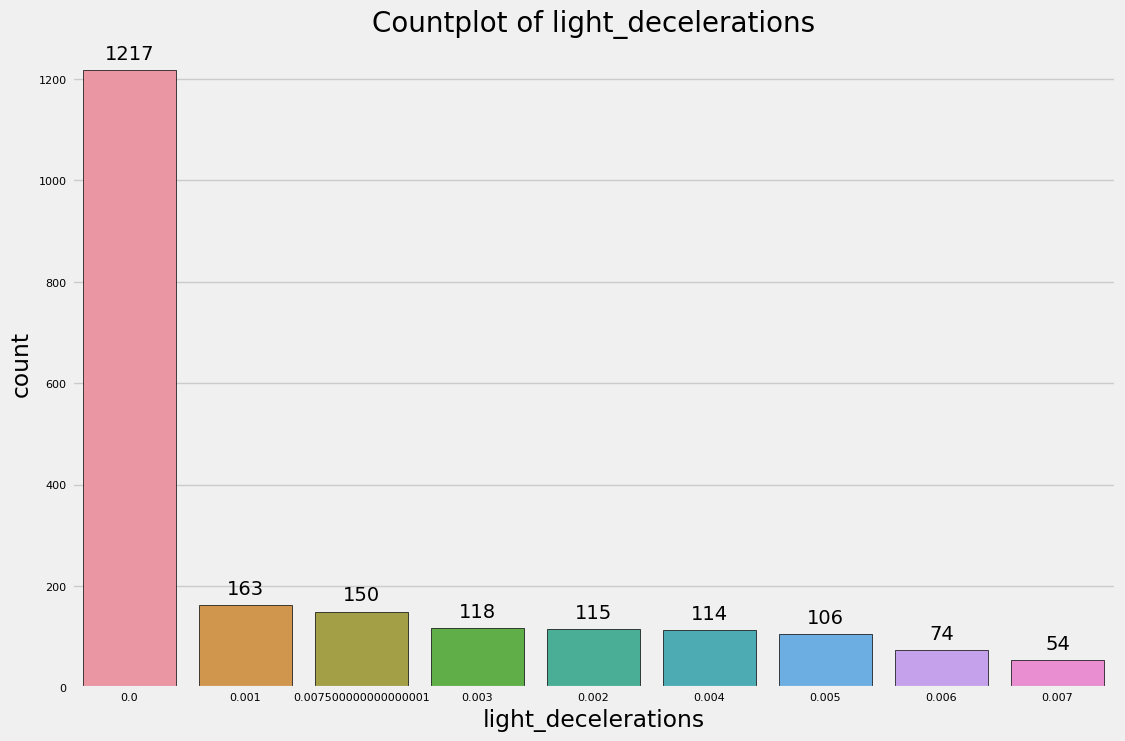

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

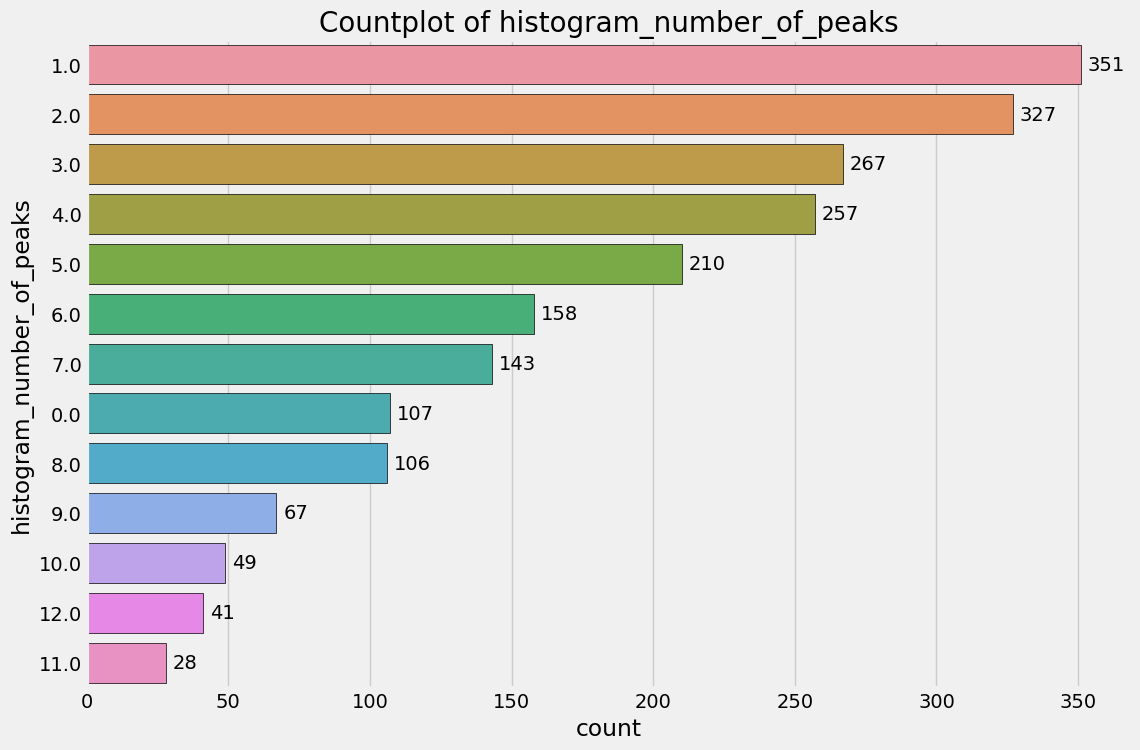

<Figure size 1200x800 with 0 Axes>

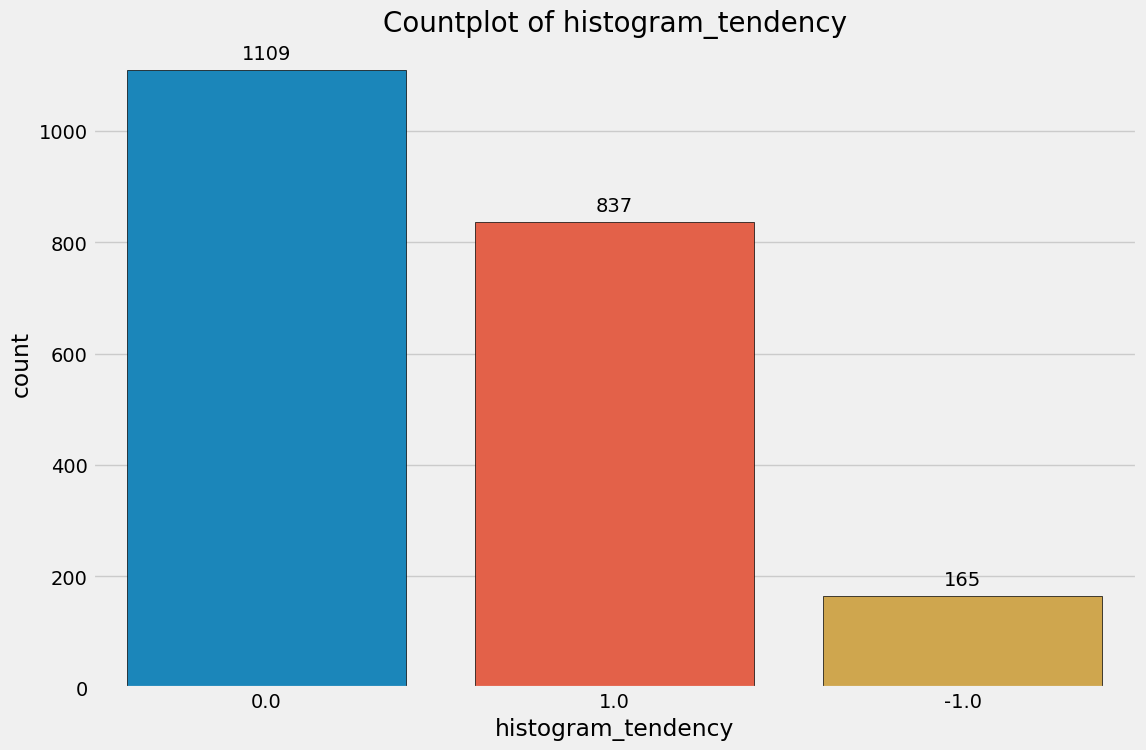

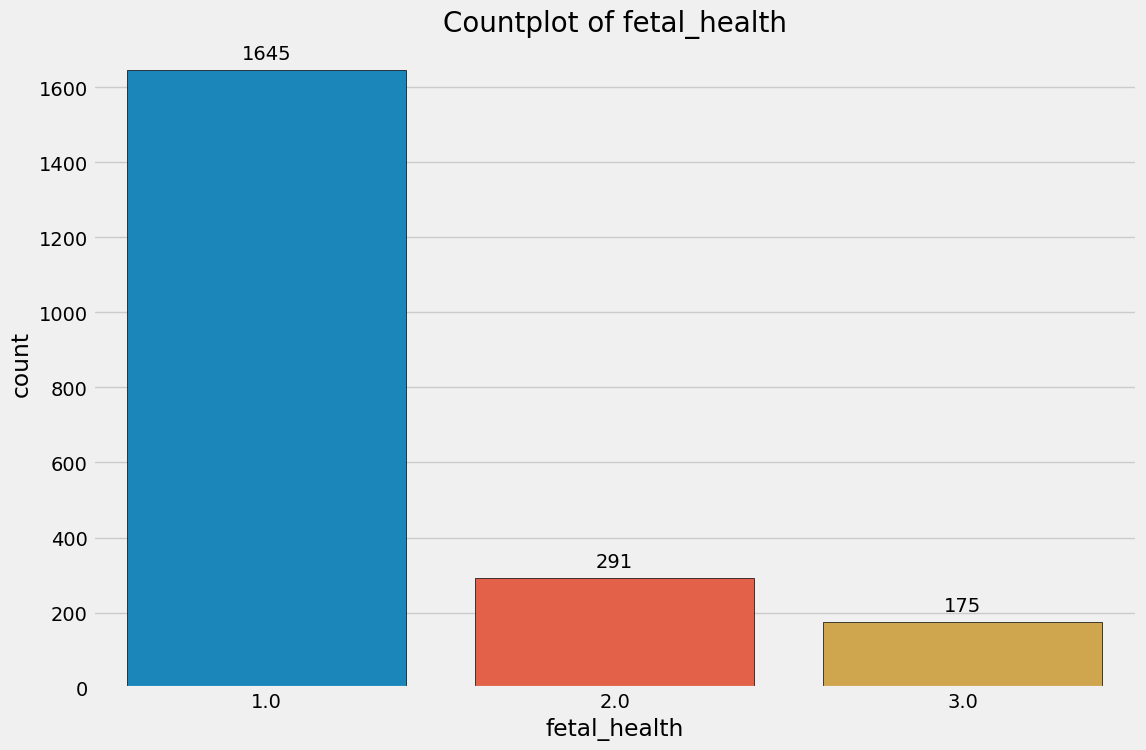

In [ ]:
fast_eda(df2,target="fetal_health")

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df2.drop(labels=['fetal_health'],axis=1),
    df2['fetal_health'],
    test_size = 0.25,
    random_state = 0)

In [ ]:
## Logistic Regression

classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
import sklearn.metrics as metrics
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))          # Accuracy of the model
print('Precision: ',metrics.precision_score(y_test,y_pred,pos_label='positive', average='micro'))        # Precision of the model
print('Recall: ',metrics.recall_score(y_test,y_pred,pos_label='positive', average='micro'))              # Recall of the model

Accuracy:  0.8598484848484849
Precision:  0.8598484848484849
Recall:  0.8598484848484849


In [ ]:
## Decision Tree
clf_entropy=DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=3) #max_depth is 3
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [ ]:
y_predict=clf_entropy.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy :','\n',accuracy_score(y_test,y_predict)*100,'%')

Accuracy : 
 89.39393939393939 %


In [ ]:
import sklearn.metrics as metrics
print('Accuracy: ',metrics.accuracy_score(y_test,y_predict))          # Accuracy of the model
print('Precision: ',metrics.precision_score(y_test,y_predict,pos_label='positive', average='micro'))        # Precision of the model
print('Recall: ',metrics.recall_score(y_test,y_predict,pos_label='positive', average='micro'))              # Recall of the model

Accuracy:  0.8939393939393939
Precision:  0.8939393939393939
Recall:  0.8939393939393939


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=1)
tree=tree.fit(x_train,y_train)
bag=BaggingClassifier(base_estimator=tree,n_estimators=500,random_state=1)
bag=bag.fit(x_train,y_train)
y_train_pred=bag.predict(x_train)
y_test_pred=bag.predict(x_test)

In [ ]:
bag_test=round(accuracy_score(y_test,y_test_pred),2)*100
print(bag_test)

93.0


In [ ]:
## Decision Tree using GINI Index

clf_gini=DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=5)

#Performing tarining
#no need of transformation

clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
y_pred3=clf_gini.predict(x_test)

In [ ]:
print("Accuracy : ",accuracy_score(y_test,y_pred3)*100,"%")

Accuracy :  91.47727272727273 %


In [ ]:
## Random Forest

#criterion{'gini','entropy'}, default='gini'

clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))          # Accuracy of the model
print('Precision: ',metrics.precision_score(y_test,y_pred,pos_label='positive', average='micro'))        # Precision of the model
print('Recall: ',metrics.recall_score(y_test,y_pred,pos_label='positive', average='micro'))              # Recall of the model

Accuracy:  0.9393939393939394
Precision:  0.9393939393939394
Recall:  0.9393939393939394


In [ ]:
## Naive Bayes
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
print('Gaussian Naive Bayes model accuracy(in %): ',metrics.accuracy_score(y_test,y_pred)*100)

Gaussian Naive Bayes model accuracy(in %):  75.75757575757575


In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))          # Accuracy of the model
print('Precision: ',metrics.precision_score(y_test,y_pred,pos_label='positive', average='micro'))        # Precision of the model
print('Recall: ',metrics.recall_score(y_test,y_pred,pos_label='positive', average='micro'))

Accuracy:  0.7575757575757576
Precision:  0.7575757575757576
Recall:  0.7575757575757576


In [ ]:
## KNN

#Train Model and Predict and 0.32
k=4
knnclassifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2).fit(x_train,y_train)
Pred_y=knnclassifier.predict(x_test)
print('Accuracy of model at k=4 is',metrics.accuracy_score(y_test,Pred_y))

Accuracy of model at k=4 is 0.9071969696969697


In [ ]:
k=2
knnclassifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2).fit(x_train,y_train)
Pred_y=knnclassifier.predict(x_test)
print('Accuracy of model at k=4 is',metrics.accuracy_score(y_test,Pred_y))

Accuracy of model at k=4 is 0.9109848484848485


In [ ]:
k=3
knnclassifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2).fit(x_train,y_train)
Pred_y=knnclassifier.predict(x_test)
print('Accuracy of model at k=4 is',metrics.accuracy_score(y_test,Pred_y))

Accuracy of model at k=4 is 0.9128787878787878


In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test,Pred_y))          # Accuracy of the model
print('Precision: ',metrics.precision_score(y_test,Pred_y,pos_label='positive', average='micro'))        # Precision of the model
print('Recall: ',metrics.recall_score(y_test,Pred_y,pos_label='positive', average='micro'))

Accuracy:  0.9128787878787878
Precision:  0.9128787878787878
Recall:  0.9128787878787878


In [ ]:
## SVM Linear
X=df2.drop(labels=['fetal_health'],axis=1)
y=df2['fetal_health']

In [ ]:
from sklearn import svm
C=1.0                 #SVM regularization parameter
svc1=svm.SVC(kernel='linear', C=1, gamma=0.1, random_state=2).fit(X,y)
svc2=svm.SVC(kernel='rbf', C=1, gamma=0.5).fit(X,y)
svc3=svm.SVC(kernel='poly', C=1, degree=5).fit(X,y)

In [ ]:
svc1.fit(x_train,y_train)

SVC(C=1, gamma=0.1, kernel='linear', random_state=2)

In [ ]:
y_pred=svc1.predict(x_test)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))          # Accuracy of the model
print('Precision: ',metrics.precision_score(y_test,y_pred,pos_label='positive', average='micro'))        # Precision of the model
print('Recall: ',metrics.recall_score(y_test,y_pred,pos_label='positive', average='micro'))

Accuracy:  0.884469696969697
Precision:  0.884469696969697
Recall:  0.884469696969697


In [ ]:
# SVM RBF
svc2.fit(x_train,y_train)

SVC(C=1, gamma=0.5)

In [ ]:
y_pred=svc2.predict(x_test)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))          # Accuracy of the model
print('Precision: ',metrics.precision_score(y_test,y_pred,pos_label='positive', average='micro'))        # Precision of the model
print('Recall: ',metrics.recall_score(y_test,y_pred,pos_label='positive', average='micro'))

Accuracy:  0.7992424242424242
Precision:  0.7992424242424242
Recall:  0.7992424242424242


In [ ]:
#SVM Polynomial
svc3.fit(x_train,y_train)


SVC(C=1, degree=5, kernel='poly')

In [ ]:
y_pred=svc3.predict(x_test)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))          # Accuracy of the model
print('Precision: ',metrics.precision_score(y_test,y_pred,pos_label='positive', average='micro'))        # Precision of the model
print('Recall: ',metrics.recall_score(y_test,y_pred,pos_label='positive', average='micro'))

Accuracy:  0.8768939393939394
Precision:  0.8768939393939394
Recall:  0.8768939393939394
